In [1]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
sns.set_style('whitegrid')

In [2]:
# I made steps to anonymize this data.
# Though, if you have any reservations - please let me know and I will remove your entry.
participants = pd.read_csv("pdwc2017_anonym.csv", parse_dates=['Order Date', 'Check-In Date'])

In [3]:
participants.head()

,Attendee Status,Order Date,Check-In Date,Would you like a T-Shirt?,What size?,Job Title,Participant Type,Call Type,Country,City
0,Checked In,2017-06-16 14:31:21.996,2017-10-19 10:35:00,Yes,Unisex Medium,J.Data Scientist,Individual,Early Bird,Poland,Warsaw
1,Attending,2017-06-16 15:39:10.002,NaT,Yes,Unisex Medium,Manager,Individual,Early Bird,Poland,Wielkie Drogi
2,Checked In,2017-06-19 09:45:10.999,2017-10-19 11:54:00,Yes,Unisex Large,Data Scientist,Individual,Early Bird,Poland,Warsaw
3,Checked In,2017-06-20 17:00:41.996,2017-10-19 10:01:00,Yes,Unisex Small,None,Individual,Early Bird,Poland,Warsaw
4,Attending,2017-06-20 23:09:45.003,NaT,Yes,Unisex XL,solution architect,Individual,Early Bird,Poland,Warsaw


In [4]:
len(participants)

415

In [5]:
# percent of people who showed up
100 * (participants['Attendee Status'] == "Checked In").mean()

90.843373493975903

In [6]:
participants['Country'].value_counts()

Poland              332
Germany              16
United Kingdom       10
Denmark              10
Netherlands           6
United States         5
Spain                 5
Sweden                5
Unknown Location      4
Czech Republic        3
Ukraine               3
Norway                3
Ireland               3
Romania               2
Italy                 2
France                2
Israel                1
Portugal              1
Latvia                1
Switzerland           1
Name: Country, dtype: int64

In [7]:
# Poland
332 / 415

0.8

In [8]:
participants.loc[lambda df: df['Country'] == "Poland"]['City'].value_counts().head(10)

Warsaw                181
Krakow                 34
Poznan                 23
Białystok              20
Wrocław                 9
Warzachewka Polska      5
Gdańsk                  4
Olsztyn                 3
Lublin                  2
Łódź                    2
Name: City, dtype: int64

In [9]:
# Warsaw
181 / 415

0.43614457831325304

In [10]:
participants.loc[lambda df: df['Country'] != "Poland"]['City'].value_counts().head(10)

London           8
Frederiksberg    7
Stockholm        5
Madrid           4
Oslo             3
Prague           3
Copenhagen       3
Amsterdam        2
Berlin           2
Almere Stad      2
Name: City, dtype: int64

In [11]:
# total number of countries
len(participants['Country'].value_counts())

20

In [12]:
# total number of cities
len(participants['City'].value_counts())

69

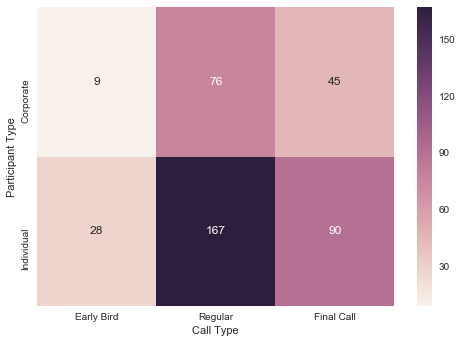

In [13]:
ticket_types = pd.pivot_table(participants, index='Participant Type',
                               columns='Call Type', values='Attendee Status', aggfunc=len)
ticket_types = ticket_types.loc[:, ['Early Bird', 'Regular', 'Final Call']]
sns.heatmap(ticket_types, annot=True, fmt="d")

Text(0.5,1,'Ticket types at PyData Warsaw 2017')

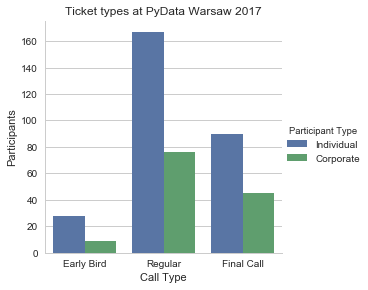

In [14]:
sns.factorplot(data=participants, x="Call Type", hue="Participant Type", kind="count", size=4)
plt.ylabel("Participants")
plt.title("Ticket types at PyData Warsaw 2017")

In [15]:
# percent of people wanting a t-shirt
100 * (participants['Would you like a T-Shirt?'] == "Yes").mean()

89.638554216867476

In [16]:
tshirts = participants["What size?"].dropna().apply(lambda x: x.replace("Unisex ", "")).value_counts()
tshirts

Large             125
Medium            122
XL                 52
Small              45
XXL                13
X-Small             8
Medium | Large      4
Small | Medium      2
XL | XXL            1
Large | XL          1
Name: What size?, dtype: int64

Text(0,0.5,'Participants')

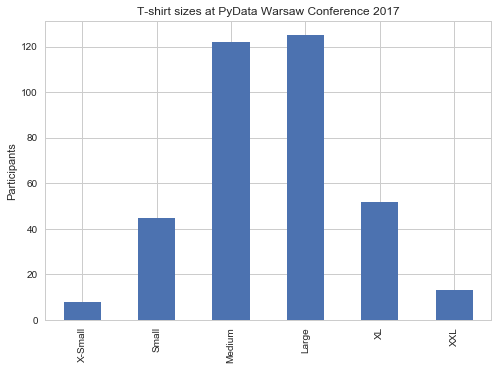

In [17]:
tshirts.loc[['X-Small', 'Small', 'Medium', 'Large', 'XL', 'XXL']].plot(kind='bar')
plt.title("T-shirt sizes at PyData Warsaw Conference 2017")
plt.ylabel("Participants")

https://www.eventbrite.com/e/pydata-warsaw-2017-tickets-34889678969#

* Early Bird ticket pricing (1 June - 16 July)
  * Individual: 199.00 zł
  * Corporate: 399.00 zł
* Regular ticket pricing (17 July - 30 September)
  * Individual: 299.00 zł
  * Corporate: 599.00 zł
* Final call ticket pricing (1 - 19 October)
  * Individual: 399.00 zł
  * Corporate: 799.00 zł


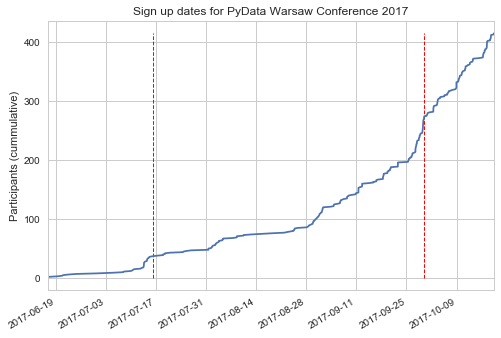

In [18]:
order_dates = participants["Order Date"].sort_values()
pd.Series(range(1, len(order_dates) + 1), index=order_dates).plot()
plt.title("Sign up dates for PyData Warsaw Conference 2017")
plt.xlabel("")
plt.ylabel("Participants (cummulative)")
plt.vlines(pd.Timestamp(datetime.date(2017, 7, 16)), 0, 415,
           linestyles='--', colors='r', linewidth=1)
plt.vlines(pd.Timestamp(datetime.date(2017, 9, 30)), 0, 415,
           linestyles='--', colors='r', linewidth=1)
# plt.text(pd.Timestamp(datetime.date(2017, 6, 24)), 400, "early bid")

In [19]:
def ymd_to_days_before(y, m, d):
    return -(pd.Timestamp(datetime.date(y, m, d)) - pd.Timestamp(datetime.date(2017, 10, 19))).total_seconds() / (60**2 * 24)

Text(0,0.5,'Participants (cumulative)')

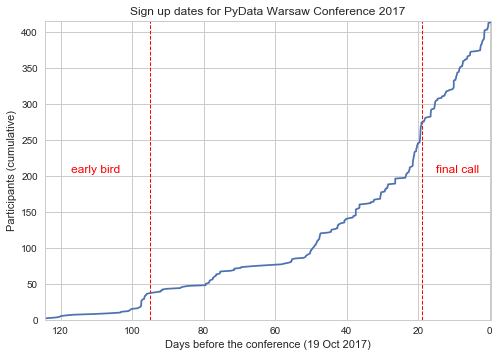

In [20]:
y_max = len(participants)
order_dates = participants["Order Date"].sort_values()
days_to = order_dates.apply(lambda x: -(x - pd.Timestamp(datetime.date(2017, 10, 19))).total_seconds() / (60**2 * 24)) 
pd.Series(range(1, len(order_dates) + 1), index=days_to).plot()

plt.vlines(ymd_to_days_before(2017, 7, 16), 0, y_max,
           linestyles='--', colors='r', linewidth=1)
plt.vlines(ymd_to_days_before(2017, 9, 30), 0, y_max,
           linestyles='--', colors='r', linewidth=1)
plt.text(117, 205, "early bird", color='r')
plt.text(15, 205, "final call", color='r')
# plt.text(ymd_to_days_before(2017, 7, 1), -15, "JUL")
# plt.text(ymd_to_days_before(2017, 8, 1), -15, "AUG")
# plt.text(ymd_to_days_before(2017, 9, 1), -15, "SEPT")
# plt.text(ymd_to_days_before(2017, 10, 1), -15, "OCT")

plt.ylim([0, y_max])
plt.title("Sign up dates for PyData Warsaw Conference 2017")
plt.xlabel("Days before the conference (19 Oct 2017)")
plt.ylabel("Participants (cumulative)")

Text(0,0.5,'Participants')

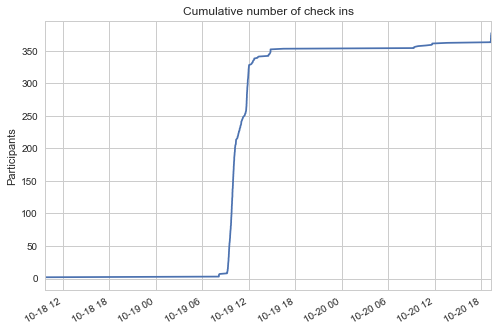

In [21]:
# warning: some people arrived earlier but registered later
checkin_dates = participants["Check-In Date"].dropna().sort_values()
pd.Series(range(1, len(checkin_dates) + 1), index=checkin_dates).plot()
plt.title("Cumulative number of check ins")
plt.xlabel("")
plt.ylabel("Participants")

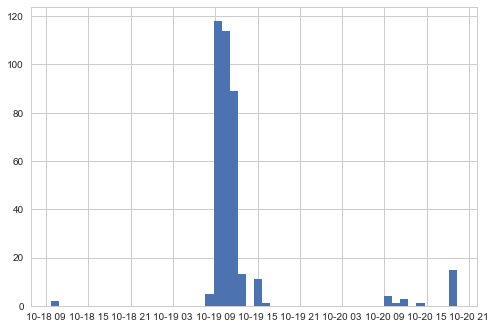

In [22]:
checkin_dates.hist(bins=50)

In [23]:
checkin19 = checkin_dates.loc[checkin_dates.apply(lambda x: x.day == 19)]


Text(0,0.5,'Participants')

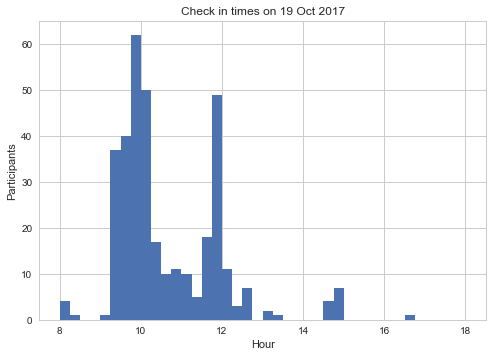

In [24]:
checkin19.apply(lambda x: x.hour + x.minute/60).hist(range=(8, 18), bins=40)
plt.title("Check in times on 19 Oct 2017")
plt.xlabel("Hour")
plt.ylabel("Participants")

In [25]:
times = participants.loc[checkin19.index, ["Order Date", "Check-In Date"]]

In [26]:
times_secs = times.applymap(lambda x: (x - pd.Timestamp(datetime.date(2017, 10, 19))).total_seconds()) 

In [27]:
times_secs.corr()

,Order Date,Check-In Date
Order Date,1.000000,-0.123597
Check-In Date,-0.123597,1.000000


In [28]:
participants["Job Title"].value_counts().head(20)

Data Scientist               60
Student                      19
Software Engineer            12
Developer                    10
Software Developer            9
CTO                           8
student                       8
Phyton Developer              7
PhD student                   6
softeare developer            5
Junior Data Scientist         5
Development                   5
Programmer                    4
R&D Engineer                  4
Senior Software Engineer      4
Software developer            4
Machine Learning Engineer     3
Researcher                    3
Intern                        3
Software engineer             3
Name: Job Title, dtype: int64

In [29]:
from collections import Counter
words = Counter()
for index, title in participants["Job Title"].items():
    words.update(title.lower().split())
words.most_common(20)

[('data', 105),
 ('scientist', 85),
 ('developer', 66),
 ('engineer', 51),
 ('software', 47),
 ('student', 35),
 ('senior', 23),
 ('junior', 16),
 ('analyst', 16),
 ('consultant', 12),
 ('manager', 11),
 ('specialist', 10),
 ('python', 9),
 ('phd', 9),
 ('team', 9),
 ('head', 8),
 ('of', 8),
 ('science', 8),
 ('r&d', 8),
 ('lead', 8)]